<a href="https://colab.research.google.com/github/perlstein/BasketballPlayers/blob/master/Compare_Basketball_Players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import elements needed
import bs4
import requests
import pandas as pd
import numpy as np
import boto3
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
# Defining how we get the basketball stats
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    # read the webpage 
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML  
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable'; 
    #therefore we create a tag object "table"
    table=soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row  
    headers=table.tr
    #the table column names are displayed  as an abbreviation; therefore we find all the abbr tags and returs an Iterator
    titles=headers.find_all("abbr")
    #we create a dictionary  and pass the table headers as the keys 
    data = {title['title']:[] for title in titles}
   #we will store each column as a list in a dictionary, the header of the column will be the dictionary key 

    #we iterate over each table row by fining each table tag tr and assign it to the objed
    for row in table.find_all('tr')[1:]:
    
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n 
        for key,a in zip(data.keys(),row.find_all("td")[2:]):
            # we append each elment and strip any extra HTML contnet 
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == ".")))

    # we remove extra rows by finding the smallest list     
    Min=min([len(x)  for x in data.values()])
    #we convert the elements in the key to floats 
    for key in data.keys():
    
        data[key]=list(map(lambda x: float(x), data[key][:Min]))
       
    return data

In [ ]:
#Links & Names
links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
      ,'https://en.wikipedia.org/wiki/LeBron_James'\
      ,'https://en.wikipedia.org/wiki/Stephen_Curry']
names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']



In [ ]:
#add player
def add_player():
  x, z = input("Basketball Player's Name: "), input("Enter Their Wikipedia Page: ") 
  print("Cool, I added: ", x) 
  print("With the Wikipedia Page ", z)
  links.append(z)
  names.append(x)

In [ ]:
# Define Yes or no Do you want to add more players?
def yes_or_no(question):
    while "the answer is invalid":
        reply = str(input(question+' (y/n): ')).lower().strip()
        if reply[0] == 'y':
            add_player()
            yes_or_no("Do you want to add another player?")
            break
        if reply[0] == 'n':
            print("Ok, we'll compare :") 
            print(names)
            #import sys
            #sys.exit() # replace the 'return False' above with this statement
            break
 

In [ ]:
#Run Yes or No Add Player
yes_or_no("Do you want to add a player?")

Do you want to add a player? (y/n): y
Basketball Player's Name: James Harden
Enter Their Wikipedia Page: https://en.wikipedia.org/wiki/James_Harden
Cool, I added:  James Harden
With the Wikipedia Page  https://en.wikipedia.org/wiki/James_Harden
Do you want to add another player? (y/n): n
Ok, we'll compare :
['Michael Jordan', 'Kobe Bryant', 'Lebron James', 'Stephen Curry', 'James Harden']


In [ ]:
convs=[]
for d in links:
  convs.append((get_basketball_stats(d)))

#Convs now is all the data pulled into a list, now we need to put it into a Panda
playstatlist =[]
index = 0
while index < len(convs):
    playstatlist.append (pd.DataFrame(convs[index]))
    index = index + 1


In [ ]:
# Creating Classes
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
#Preview
print(playstatlist[1])

    Games played  Games started  ...  Blocks per game  Points per game
0           71.0            6.0  ...              0.3              7.6
1           79.0            1.0  ...              0.5             15.4
2           50.0           50.0  ...              1.0             19.9
3           66.0           62.0  ...              0.9             22.5
4           68.0           68.0  ...              0.6             28.5
5           80.0           80.0  ...              0.4             25.2
6           82.0           82.0  ...              0.8             30.0
7           65.0           64.0  ...              0.4             24.0
8           66.0           66.0  ...              0.8             27.6
9           80.0           80.0  ...              0.4             35.4
10          77.0           77.0  ...              0.5             31.6
11          82.0           82.0  ...              0.5             28.3
12          82.0           82.0  ...              0.5             26.8
13    

In [ ]:
#Define Points Per Game Function
def ppg (data_frame=playstatlist[0], name="Name"):
    plt.plot(data_frame[['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')



Here's a comparison of the Points Per Game for :
['Michael Jordan', 'Kobe Bryant', 'Lebron James', 'Stephen Curry', 'James Harden']


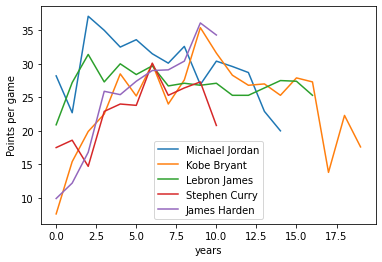

In [ ]:
print("Here's a comparison of the Points Per Game for :")
print(names)
m=0
for m in range(len(playstatlist)):
  ppg (playstatlist[m], names[m])
  m+1

